# FoldX
## process both FoldX and DDGun3D

In [1]:
import pandas
import numpy
from copy import deepcopy

In [2]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0)#,usecols=['Protein', 'Mut_pdb','DDG_dir','DDG_inv','FoldX_dir','FoldX_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
display(foldx_df.head())
print(foldx_df.columns)

,Protein,Mut_pdb,DDG_dir,DDG_inv,MAESTRO_dir,MAESTRO_inv,FoldX_dir,FoldX_inv,PremPS_dir,PremPS_inv,...,Mut_pdb_inv,Mut_Seq_inv,INPS3D_dir,INPS3D_inv,INPS-Seq_dir,INPS-Seq_inv,ThermoNet_dir,ThermoNet_inv,Dynamut2_dir,Dynamut2_inv
0,1amqA,C191F,-1.60,1.60,-1.290230,-2.330405,-3.458090,-1.167050,-0.70,0.83,...,F191C,F180C,-2.370220,-0.632415,-1.029200,0.505217,0.3728,-1.0064,-1.34,-2.07
1,1amqA,C191S,-1.90,1.90,-2.040645,-1.579652,0.178326,-0.117104,-1.84,1.72,...,S191C,S180C,-1.444290,-0.174529,-0.132376,0.166903,-0.0194,0.0058,-2.18,-1.60
2,1amqA,C191W,-3.90,3.90,-1.387711,-2.306045,-6.466620,-1.234990,-1.29,1.64,...,W191C,W180C,-1.855400,-1.200120,0.041922,-0.245567,0.4185,-0.0369,-1.75,-1.75
3,1amqA,C191Y,-2.30,2.30,-1.467389,-2.086929,-1.795960,0.509656,-0.76,1.66,...,Y191C,Y180C,-1.419390,-1.665550,0.069468,-0.166052,1.2850,-0.8779,-1.23,-1.24
4,1arrA,P8L,2.49,-2.49,0.427826,-0.487971,-0.710842,-5.194210,-0.13,0.31,...,L8P,L3P,-0.534797,0.027555,-0.858790,0.083820,1.0747,-0.1365,-0.73,-0.46


Index(['Protein', 'Mut_pdb', 'DDG_dir', 'DDG_inv', 'MAESTRO_dir',
       'MAESTRO_inv', 'FoldX_dir', 'FoldX_inv', 'PremPS_dir', 'PremPS_inv',
       'Dynamut_dir', 'Dynamut_inv', 'mCSM_dir', 'mCSM_inv', 'SDM_dir',
       'SDM_inv', 'DUET_dir', 'DUET_inv', 'I-Mutant3.0_dir', 'I-Mutant3.0_inv',
       'I-Mutant3.0-Seq_dir', 'I-Mutant3.0-Seq_inv', 'MUpro_dir', 'MUpro_inv',
       'SAAFEC-SEQ_dir', 'SAAFEC-SEQ_inv', 'ACDC-NN_dir', 'ACDC-NN_inv',
       'ACDC-NN-2str_dir', 'ACDC-NN-2str_inv', 'ACDC-NN-Seq_dir',
       'ACDC-NN-Seq_inv', 'PoPMuSiC_dir', 'PoPMuSiC_inv', 'DDGun3D_dir',
       'DDGun3D_inv', 'DDGun_dir', 'DDGun_inv', 'DDG', 'Ph', 'T', 'Mut_Seq',
       'Protein_inv', 'Mut_pdb_inv', 'Mut_Seq_inv', 'INPS3D_dir', 'INPS3D_inv',
       'INPS-Seq_dir', 'INPS-Seq_inv', 'ThermoNet_dir', 'ThermoNet_inv',
       'Dynamut2_dir', 'Dynamut2_inv'],
      dtype='object')


In [3]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0,usecols=['Protein', 'Mut_pdb','Mut_pdb_inv','DDG_dir','DDG_inv','FoldX_dir','FoldX_inv','DDGun3D_dir', 'DDGun3D_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
foldx_df

,Mut_pdb,DDG_dir,DDG_inv,FoldX_dir,FoldX_inv,DDGun3D_dir,DDGun3D_inv,Mut_pdb_inv
Protein,,,,,,,,
1amqA,C191F,-1.60,1.60,-3.458090,-1.167050,0.9,-1.0,F191C
1amqA,C191S,-1.90,1.90,0.178326,-0.117104,-0.5,0.4,S191C
1amqA,C191W,-3.90,3.90,-6.466620,-1.234990,1.0,-1.1,W191C
1amqA,C191Y,-2.30,2.30,-1.795960,0.509656,1.3,-1.4,Y191C
1arrA,P8L,2.49,-2.49,-0.710842,-5.194210,0.1,-0.1,L8P
...,...,...,...,...,...,...,...,...
5ptiA,F22A,-1.20,1.20,-3.354030,0.428306,-2.5,2.8,A22F
5ptiA,F45A,-6.90,6.90,-3.351550,3.440730,-4.4,3.7,A45F
5ptiA,N43G,-5.70,5.70,-1.977350,-0.783265,-1.9,1.5,G43N


In [4]:
_dir=foldx_df.iloc[:,[0,1,3]].rename({'Mut_pdb': 'mut','DDG_dir': 'ddg','FoldX_dir':'foldx'},axis=1)
_dir.head()

,mut,ddg,foldx
Protein,,,
1amqA,C191F,-1.60,-3.458090
1amqA,C191S,-1.90,0.178326
1amqA,C191W,-3.90,-6.466620
1amqA,C191Y,-2.30,-1.795960
1arrA,P8L,2.49,-0.710842


In [5]:
_dir[['ddg','foldx']].corr()

,ddg,foldx
ddg,1.000000,0.566316
foldx,0.566316,1.000000


In [6]:
_inv=foldx_df.iloc[:,[7,2,4]].rename({'Mut_pdb_inv': 'mut','DDG_inv': 'ddg','FoldX_inv':'foldx'},axis=1)
_inv.head()

,mut,ddg,foldx
Protein,,,
1amqA,F191C,1.60,-1.167050
1amqA,S191C,1.90,-0.117104
1amqA,W191C,3.90,-1.234990
1amqA,Y191C,2.30,0.509656
1arrA,L8P,-2.49,-5.194210


In [7]:
foldx_train=pandas.concat([_dir,_inv])
foldx_train.head(), foldx_train.shape

(           mut   ddg     foldx
 Protein                       
 1amqA    C191F -1.60 -3.458090
 1amqA    C191S -1.90  0.178326
 1amqA    C191W -3.90 -6.466620
 1amqA    C191Y -2.30 -1.795960
 1arrA      P8L  2.49 -0.710842,
 (704, 3))

,ddg,foldx
ddg,1.00000,0.50851
foldx,0.50851,1.00000


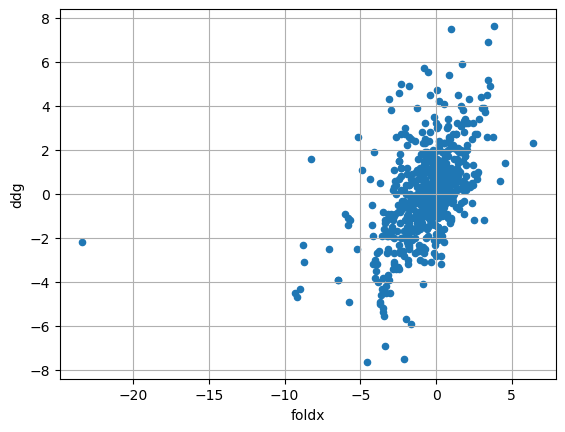

In [8]:
plain_foldx_plot= foldx_train.plot.scatter(x="foldx", y="ddg", grid=True)
foldx_train[['ddg','foldx']].corr()

## ddFEP

In [9]:
import math
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
aa_labels = [
    "A",
    "R",
    "N",
    "D",
    "C",
    "Q",
    "E",
    "G",
    "H",
    "I",
    "L",
    "K",
    "M",
    "F",
    "P",
    "S",
    "T",
    "W",
    "Y",
    "V",
]

In [11]:
def expand_mut(x):
    x["from_aa"] = x["mut"][0]
    x["position"] = x["mut"][1:-1]
    x["to_aa"] = x["mut"][-1]
    return x

In [12]:
ddfep_opt =foldx_train.apply(expand_mut, axis=1)

In [13]:
#ddfep_opt = deepcopy(foldx_train)
for _ in sorted(aa_labels):
    ddfep_opt[_] = 0
ddfep_opt

,mut,ddg,foldx,from_aa,position,to_aa,A,C,D,E,...,M,N,P,Q,R,S,T,V,W,Y
Protein,,,,,,,,,,,,,,,,,,,,,
1amqA,C191F,-1.60,-3.458090,C,191,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191S,-1.90,0.178326,C,191,S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191W,-3.90,-6.466620,C,191,W,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191Y,-2.30,-1.795960,C,191,Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1arrA,P8L,2.49,-0.710842,P,8,L,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5ptiA,A22F,1.20,0.428306,A,22,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,A45F,6.90,3.440730,A,45,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,G43N,5.70,-0.783265,G,43,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [15]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')
ddgun_train=deepcopy(ddfep_opt)

In [16]:
### fit test

In [17]:
X_optfep= ddfep_opt[['foldx']+sorted(aa_labels)].to_numpy()
y=ddfep_opt['ddg'].to_numpy()
X_optfep.shape, y.shape

((704, 21), (704,))

In [18]:
dd_optfep_model = LinearRegression(fit_intercept=False).fit(
    X_optfep,
    y,
)

In [53]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([ 0.34405849, -0.54786104,  0.69912064, -0.71000046, -0.16356383,
         0.5148939 , -1.08324699, -1.03471692,  1.20357786, -0.85999819,
         0.64640703,  0.06969727, -0.19558428, -0.77814633,  0.12466614,
         1.23416851, -0.42059844,  0.63249059,  0.62866814, -1.03031711,
         1.07034354]),
 0.0,
 0.6748225679599799)

#### ddMBC coefs

In [55]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [56]:
coefs=dict(zip(["delta"] + sorted(kd.keys()), dd_optfep_model.coef_))
coefs

{'delta': 0.344058486830258,
 'A': -0.5478610433089148,
 'C': 0.6991206389232623,
 'D': -0.7100004633265892,
 'E': -0.16356382835748484,
 'F': 0.51489389512439,
 'G': -1.0832469890911551,
 'H': -1.0347169237980995,
 'I': 1.2035778610542909,
 'K': -0.8599981865516023,
 'L': 0.6464070311982444,
 'M': 0.06969726626160495,
 'N': -0.1955842786785728,
 'P': -0.7781463343154884,
 'Q': 0.12466613798057691,
 'R': 1.2341685064799517,
 'S': -0.42059843774676836,
 'T': 0.6324905863270525,
 'V': 0.628668136440315,
 'W': -1.0303171139360348,
 'Y': 1.0703435393210192}

In [59]:
coefs_df = pandas.DataFrame({'FoldX': coefs})
coefs_df
#coefs_df.to_csv('foldx_params.csv')

,FoldX
delta,0.344058
A,-0.547861
C,0.699121
D,-0.710000
E,-0.163564
F,0.514894
G,-1.083247
H,-1.034717
I,1.203578
K,-0.859998


In [20]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

RMSE: 1.4479369906512354


,ddg,ddfep_opt
ddg,1.000000,0.682508
ddfep_opt,0.682508,1.000000


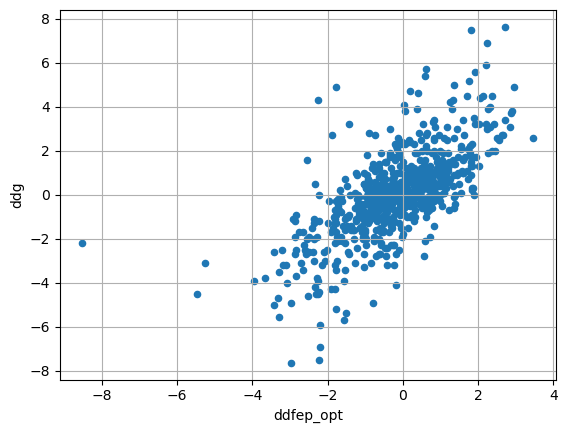

In [22]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

print('RMSE:',math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt'])))
ddfep_opt[['ddg','ddfep_opt']].corr()

### Crossvalidate

In [23]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.48394879, 0.49917118, 0.33368061, 0.16180314, 0.44907436,
       0.45820509, 0.48802607, 0.38908228, 0.48119967, 0.24084862,
       0.41246167, 0.37824684, 0.32974493, 0.42602324, 0.45587399,
       0.47495914, 0.37848041, 0.48553965, 0.16995268, 0.35575701,
       0.44163155, 0.49223783, 0.47303687, 0.36348749, 0.27493657,
       0.44148826, 0.41086527, 0.28114623, 0.34582526, 0.50774478,
       0.35630971, 0.43776267, 0.37377285, 0.449971  , 0.3648134 ,
       0.42153842, 0.39857056, 0.47249397, 0.36714118, 0.3426179 ,
       0.39976135, 0.36620476, 0.51281559, 0.1943813 , 0.50121243,
       0.37464226, 0.42206863, 0.35359816, 0.44060353, 0.45023931])

In [24]:
_r=numpy.sqrt(optfep_rsq)
_r.mean(), _r.std()

(0.6264029327668892, 0.07293377294442138)

In [26]:
math.sqrt(optfep_rsq.mean()), optfep_rsq.std()

(0.6306345767676145, 0.08434935314899848)

In [27]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.6264029327668892

## Test on S669

In [28]:
_669_foldx = pandas.read_csv(
    "Data_s669_with_predictions.csv",
    index_col=None,
    usecols=["Protein", "PDB_Mut", "FoldX_dir", "FoldX_inv","DDGun3D_dir", "DDG_checked_dir", "DDG_checked_inv"],
)
_669_foldx["hash"] = _669_foldx.apply(
    lambda x: "_".join([x["Protein"], x["PDB_Mut"]]), axis=1
)
_669_foldx['experimental']=True
_669_foldx
# list(_669_foldx.columns)

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,DDG_checked_inv,hash,experimental
0,1A0FA,S11A,-1.800,0.551703,0.5,-0.571577,1.800,1A0FA_S11A,True
1,1A7VA,A104H,-2.690,0.562630,-0.1,-0.820657,2.690,1A7VA_A104H,True
2,1A7VA,A66H,-1.980,-0.395478,0.5,-0.228698,1.980,1A7VA_A66H,True
3,1A7VA,A91H,-1.700,0.045107,-0.1,-0.590049,1.700,1A7VA_A91H,True
4,1A7VA,D3H,-1.360,-3.565060,0.2,0.056278,1.360,1A7VA_D3H,True
...,...,...,...,...,...,...,...,...,...
664,5JXBA,D329P,-1.440,-0.778776,-0.2,NaN,1.440,5JXBA_D329P,True
665,5OAQA,Y429H,-2.990,-3.408590,-2.4,1.961710,2.990,5OAQA_Y429H,True
666,5VP3A,R39K,0.413,-0.621078,-1.0,0.093390,-0.413,5VP3A_R39K,True
667,5VP3A,S128G,-0.378,-1.227820,-0.8,-0.960481,0.378,5VP3A_S128G,True


In [29]:
_461_muts = pandas.read_csv("s461_muts.csv", sep=" ")

s461_hashes = set(_461_muts.apply(lambda x: "_".join([x["pdb"], x["mut"]]), axis=1))
_461_muts.head()

,pdb,mut,ddg
0,1A0FA,S11A,-1.800
1,1BA3A,H461D,-1.745
2,1BA3A,H489D,0.287
3,1BA3A,H489K,-0.287
4,1BA3A,H489M,-0.263


In [30]:
_669_foldx['s461']=_669_foldx.apply( lambda x: x['hash'] in s461_hashes, axis=1)
#_669_foldx['FoldX_inv'] = - _669_foldx['FoldX_inv']
_669_foldx.head()

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,DDG_checked_inv,hash,experimental,s461
0,1A0FA,S11A,-1.80,0.551703,0.5,-0.571577,1.80,1A0FA_S11A,True,True
1,1A7VA,A104H,-2.69,0.562630,-0.1,-0.820657,2.69,1A7VA_A104H,True,False
2,1A7VA,A66H,-1.98,-0.395478,0.5,-0.228698,1.98,1A7VA_A66H,True,False
3,1A7VA,A91H,-1.70,0.045107,-0.1,-0.590049,1.70,1A7VA_A91H,True,False
4,1A7VA,D3H,-1.36,-3.565060,0.2,0.056278,1.36,1A7VA_D3H,True,False


In [31]:
_669_foldx['revmut']=_669_foldx['PDB_Mut'].apply(lambda x: ''.join([x[-1],x[1:-1],x[0]]))
_669_foldx.head()

,Protein,PDB_Mut,DDG_checked_dir,FoldX_dir,DDGun3D_dir,FoldX_inv,DDG_checked_inv,hash,experimental,s461,revmut
0,1A0FA,S11A,-1.80,0.551703,0.5,-0.571577,1.80,1A0FA_S11A,True,True,A11S
1,1A7VA,A104H,-2.69,0.562630,-0.1,-0.820657,2.69,1A7VA_A104H,True,False,H104A
2,1A7VA,A66H,-1.98,-0.395478,0.5,-0.228698,1.98,1A7VA_A66H,True,False,H66A
3,1A7VA,A91H,-1.70,0.045107,-0.1,-0.590049,1.70,1A7VA_A91H,True,False,H91A
4,1A7VA,D3H,-1.36,-3.565060,0.2,0.056278,1.36,1A7VA_D3H,True,False,H3D


In [32]:
def unpack_mut_code(mut_label):
    "convert mut_label field to my expanded format"
    x["from_aa"] = x[mut_label][0]
    x["to_aa"] = x[mut_label][-1]
    x["position"] = int(x[mut_label][1:-1])
    return x

In [33]:
_669_dir=_669_foldx.iloc[:,[0,1,2,3,-3,-2]].rename({'PDB_Mut': 'mut','DDG_checked_dir': 'ddg','FoldX_dir':'foldx'},axis=1).apply(expand_mut, axis=1)
_669_dir.head()

,Protein,mut,ddg,foldx,experimental,s461,from_aa,position,to_aa
0,1A0FA,S11A,-1.80,0.551703,True,True,S,11,A
1,1A7VA,A104H,-2.69,0.562630,True,False,A,104,H
2,1A7VA,A66H,-1.98,-0.395478,True,False,A,66,H
3,1A7VA,A91H,-1.70,0.045107,True,False,A,91,H
4,1A7VA,D3H,-1.36,-3.565060,True,False,D,3,H


In [34]:
_669_dir[['ddg','foldx']].corr()

,ddg,foldx
ddg,1.000000,0.214081
foldx,0.214081,1.000000


In [35]:
_669_inv=_669_foldx.iloc[:,[0,6,5,-3,-2,-1]].rename({'revmut': 'mut','DDG_checked_inv': 'ddg','FoldX_inv':'foldx'},axis=1).apply(expand_mut, axis=1)
_669_inv['experimental']= False
_669_inv.head()

,Protein,ddg,foldx,experimental,s461,mut,from_aa,position,to_aa
0,1A0FA,1.80,-0.571577,False,True,A11S,A,11,S
1,1A7VA,2.69,-0.820657,False,False,H104A,H,104,A
2,1A7VA,1.98,-0.228698,False,False,H66A,H,66,A
3,1A7VA,1.70,-0.590049,False,False,H91A,H,91,A
4,1A7VA,1.36,0.056278,False,False,H3D,H,3,D


In [36]:
_669_inv[['ddg','foldx']].corr()

,ddg,foldx
ddg,1.000000,0.217521
foldx,0.217521,1.000000


In [37]:
_669_full=pandas.concat([_669_dir,_669_inv], ignore_index=True)
_669_full.shape

(1338, 9)

In [38]:
_669_full[['ddg','foldx']].corr()

,ddg,foldx
ddg,1.000000,0.306655
foldx,0.306655,1.000000


RMSE: 2.3979470963814915


,ddg,foldx
ddg,1.000000,0.306655
foldx,0.306655,1.000000


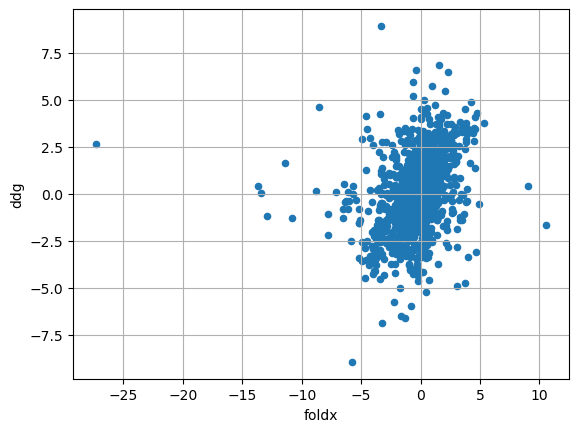

In [40]:
_669_full_clean = _669_full.dropna()
foldx_669_plot = _669_full_clean.plot.scatter(x="foldx", y="ddg", grid=True)

print("RMSE:", math.sqrt(mean_squared_error(_669_full_clean["ddg"], _669_full_clean["foldx"])))
_669_full_clean[['ddg','foldx']].corr()

In [41]:
## Go ddMBC
foldx_s669=deepcopy(_669_full_clean)

In [42]:
for _ in sorted(aa_labels):
    foldx_s669[_]=0
foldx_s669=foldx_s669.apply(encode_mutation, axis=1)

In [43]:
X669_optfep= foldx_s669[['foldx']+sorted(aa_labels)].to_numpy()
X669_optfep.shape

(1328, 21)

In [44]:
foldx_s669['ddfep_opt']=dd_optfep_model.predict(X669_optfep)

RMSE: 1.8240032282091982


,ddg,ddfep_opt
ddg,1.000000,0.422075
ddfep_opt,0.422075,1.000000


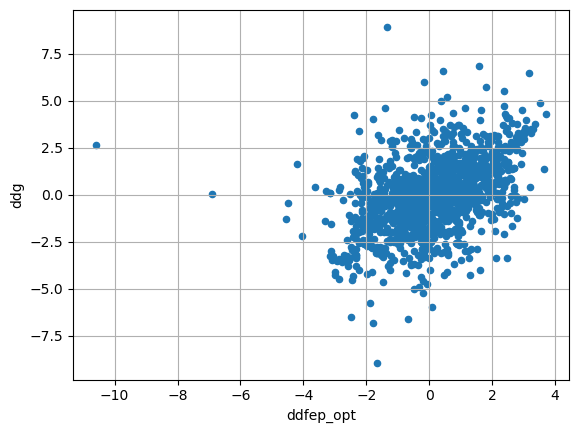

In [42]:
foldx_s669_plot = foldx_s669.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE:',math.sqrt(mean_squared_error(foldx_s669['ddg'],foldx_s669['ddfep_opt'])))
foldx_s669[['ddg','ddfep_opt']].corr()

In [47]:
foldx_s669[foldx_s669['experimental'] == True][['ddg','foldx','ddfep_opt']].corr()

,ddg,foldx,ddfep_opt
ddg,1.000000,0.214081,0.307288
foldx,0.214081,1.000000,0.609177
ddfep_opt,0.307288,0.609177,1.000000


In [48]:
sum(foldx_s669['experimental'])

667

In [49]:
foldx_s669[foldx_s669['experimental'] == False][['ddg','foldx','ddfep_opt']].corr()

,ddg,foldx,ddfep_opt
ddg,1.000000,0.217521,0.286412
foldx,0.217521,1.000000,0.697787
ddfep_opt,0.286412,0.697787,1.000000


## S461

In [50]:
foldx_s461=deepcopy(foldx_s669[ foldx_s669['s461']])
foldx_s461.shape

(920, 30)

In [51]:
print('RMSE foldx:',math.sqrt(mean_squared_error(foldx_s461['ddg'],foldx_s461['foldx'])))

RMSE foldx: 2.0251642437125095


RMSE foldx/ddMBC: 1.4436105408639792


,ddg,foldx,ddfep_opt
ddg,1.000000,0.431673,0.576755
foldx,0.431673,1.000000,0.700123
ddfep_opt,0.576755,0.700123,1.000000


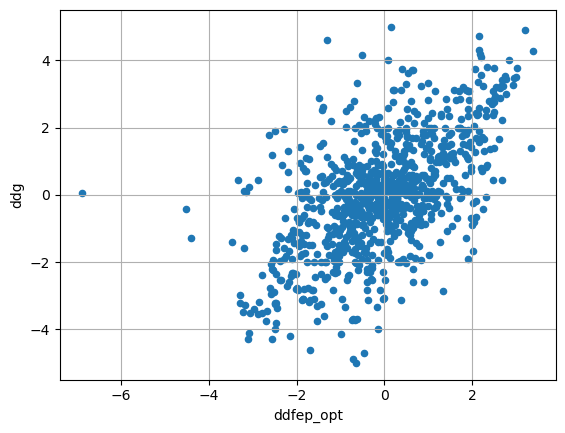

In [52]:
foldx_s461_plot = foldx_s461.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE foldx/ddMBC:',math.sqrt(mean_squared_error(foldx_s461['ddg'],foldx_s461['ddfep_opt'])))
foldx_s461[['ddg','foldx','ddfep_opt']].corr()

In [49]:
foldx_s461[foldx_s461['experimental'] == True][['ddg','foldx','ddfep_opt']].corr()

,ddg,foldx,ddfep_opt
ddg,1.000000,0.213666,0.380891
foldx,0.213666,1.000000,0.687324
ddfep_opt,0.380891,0.687324,1.000000


In [50]:
sum(foldx_s461['experimental'])

461

In [51]:
foldx_s461[foldx_s461['experimental'] == False][['ddg','foldx','ddfep_opt']].corr()

,ddg,foldx,ddfep_opt
ddg,1.000000,0.397641,0.451219
foldx,0.397641,1.000000,0.692084
ddfep_opt,0.451219,0.692084,1.000000
